In [1]:
import sys
sys.path.append('../src')

from glob import glob
import pickle
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Markdown
from tqdm import tqdm
from joblib import Parallel, delayed

from geoq import geocoder
from geoq import gemini

/home/raulramos/conda/envs/lunarlab-env/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# select any image


In [2]:
descriptions_dir = '/datasets/genai-geo-embeddings/chips'
files = glob(f'{descriptions_dir}/*.pkl')
len(files)

48313

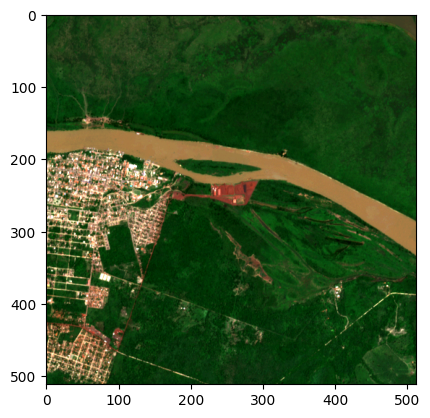

In [4]:
file = np.random.choice(files)
#file = '/datasets/genai-geo-embeddings/chips/0cae75baf09da.pkl'
with open(file, 'rb') as f:
    z = pickle.load(f)
plt.imshow(z['img'])

## Already generated description for this chip

In [5]:
Markdown(z['description'])

**Dominant Land Cover:**
The image is dominated by dense green forest (approximately 60%). A significant portion is covered by a wide, muddy brown river (approximately 25%). An urban area with light-colored buildings is present (approximately 10%). There are also patches of exposed, reddish-brown earth (approximately 5%).

**Terrain:**
The terrain is characterized by rolling hills, particularly evident in the eastern and southern portions of the image. These hills have moderate slopes and are densely covered in vegetation. There is no visible mountainous terrain.

**Vegetation:**
*   **Type:** Dense forest.
*   **Location:** Covers the majority of the image, particularly the eastern, southern, and northern portions, surrounding the urban area and the river.
*   **Extent:** Dense and appears to be lush green.
*   **Patterns:** The forest cover is largely uniform, with some areas showing slightly more variation or interruption by terrain.

**Water Bodies:**
*   **Type:** A wide, meandering river.
*   **Location:** Runs diagonally across the image from the northwest to the southeast.
*   **Size/Extent:** It is a substantial feature, appearing to be the dominant water body.
*   **Flow Direction:** Appears to be flowing from northwest to southeast.
*   **Shoreline Characteristics:** The shoreline adjacent to the urban area appears somewhat developed, while the opposite bank is lined with dense forest. There is a distinct, elongated island or sandbar in the middle of the river.

**Man-Made Structures:**
*   **Type:** Urban area and what appears to be an industrial or development site.
*   **Location:** The urban area is situated on the western bank of the river. The development site is located on a peninsula jutting into the river, on the eastern side, directly opposite the urban area.
*   **Size/Extent:** The urban area is moderately sized, characterized by a grid-like pattern of streets and buildings. The development site is a distinct, rectangular area with a reddish-brown hue, suggesting exposed earth or construction materials.
*   **Arrangement:** The urban area is arranged in a relatively organized, grid-like pattern. The development site is a concentrated, rectangular cluster of activity.

**Geological Features:**
*   **Type:** Patches of exposed earth.
*   **Location:** Several small patches are visible within the forested areas, particularly on some of the hill slopes. The most prominent is the large development site on the eastern bank of the river.
*   **Shape, Color, and Texture:** These patches are irregular in shape, with a distinctive reddish-brown color and appear to be areas of cleared land or exposed soil.

**Other Distinctive Features:**
The most distinctive feature is the juxtaposition of the developed urban area on one side of the wide, muddy river with the large, exposed reddish-brown development site on the opposite bank. The dense, green forest provides a stark contrast to these developed areas and the river.

Coverage estimation:
```json
{
  "forest": "60%",
  "river": "25%",
  "urban area": "10%",
  "exposed earth/development site": "5%"
}
```
### Geographical location
```json
{
    "plus_code": "XCV8+94",
    "administrative_area_level_2": "Lad\u00e1rio",
    "administrative_area_level_1": "State of Mato Grosso do Sul",
    "country": "Brazil",
    "coords": {
        "lon": "-57.5846",
        "lat": "-19.0065"
    }
}
```
    

## Prompt used to generate descriptions from images

In [6]:
Markdown(gemini.best_gemini_generation_prompt)


You are analyzing a satellite image to create a comprehensive textual description for precise image retrieval from a vast da
tabase.  Your description will serve as a detailed visual fingerprint, enabling users to pinpoint this specific image among 
millions using text-based search queries.

Structure your description into the following categories, providing specific details for each:

* **Dominant Land Cover:** Identify the most prominent land cover types (e.g., urban, forest, agricultural, water, barren) a
nd estimate the percentage of the image covered by each.

* **Terrain:** Describe the dominant terrain characteristics.  For each feature (mountains, valleys, plateaus, canyons, hill
s, coastlines, etc.), specify:
    - **Type:** (e.g., mountain range, valley, coastal plain)
    - **Location:** Precise location within the image (e.g., "northwest quadrant," "stretching from east to west")
    - **Size/Extent:**  (e.g., "small," "large," "covering the southern third")
    - **Shape and Attributes:** (e.g., "jagged peaks," "steep slopes," "sandy beach")

* **Vegetation:** Describe all significant vegetation types. For each (forests, grasslands, shrublands, agricultural fields,
 etc.), specify:
    - **Type:**  (e.g., "deciduous forest," "coniferous forest," "cultivated fields")
    - **Location:** Precise location
    - **Extent:**  (e.g., "dense," "sparse," "covering the eastern half")
    - **Health and Appearance:** (e.g., "healthy," "dry," "lush green")
    - **Patterns:**  (e.g., "uniform," "patchy," "linear")

* **Water Bodies:**  Describe all significant water features.  For each (rivers, lakes, oceans, reservoirs, glaciers, etc.),
 specify:
    - **Type:** (e.g., "meandering river," "crescent-shaped lake")
    - **Location:** Precise location
    - **Size/Extent:**
    - **Flow Direction (for rivers):**
    - **Shoreline Characteristics:** (e.g., "rocky," "sandy," "developed")

* **Man-Made Structures:** Describe all significant human-made features.  For each (roads, buildings, bridges, dams, urban a
reas, airports, agricultural infrastructure, etc.), specify:
    - **Type:**  (e.g., "highway," "residential area," "industrial complex")
    - **Location:**  Precise location
    - **Size/Extent:**
    - **Arrangement:** (e.g., "linear," "clustered," "grid-like")
    - **Materials (if apparent):** (e.g., "concrete," "metal")

* **Geological Features:**  Describe any unique geological formations.  For each (rock outcrops, fault lines, volcanic 
features, etc.), specify:
    - **Type:** (e.g., "granite outcrop," "volcanic crater")
    - **Location:** Precise location
    - **Size/Extent:**
    - **Shape, Color, and Texture:**

* **Other Distinctive Features:**  Describe any other visually prominent features not captured above (e.g., unique land cover 
textures, atmospheric phenomena, signs of natural events).


Generate a textual description, focusing on features that are most distinctive and useful for differentiating this image.  
Pay close attention to spatial relationships, noting the proximity and arrangement of features. Aim for a comprehensive 
yet concise description to facilitate accurate and efficient image retrieval using text-based searches.  Provide illustrative 
examples if necessary.

Additionally, append a section titled 'Coverage estimation', and provide in it a json formated output of 
'feature_name': 'percentage of coverage in the image'


## Use Gemini to create a new description of this image

In [7]:
from importlib import reload
reload(gemini)

<module 'geoq.gemini' from '/datasets/home/raulramos/genai-eo-embeddings/notebooks/../src/geoq/gemini.py'>

In [8]:
gem = gemini.GeminiMultimodalModel(api_key='../../secrets/gemini.txt', verbose=True, generation_model_name='gemini-2.5-flash-lite')

2025-08-10 22:41:49.450 | INFO     | geoq.gemini:__init__:115 - using generation model gemini-2.5-flash-lite
2025-08-10 22:41:49.451 | INFO     | geoq.gemini:__init__:116 - using embeddings model gemini-embedding-001
2025-08-10 22:41:49.452 | INFO     | geoq.gemini:__init__:117 - using config {'temperature': 1, 'top_p': 0.95, 'max_output_tokens': 8192, 'response_mime_type': 'text/plain'}


In [9]:
descr = gem.generate_description_for_image(z['img'])

2025-08-10 22:41:53.108 | INFO     | geoq.gemini:generate_description_for_image:149 - uploaded file image to prompt
2025-08-10 22:41:53.110 | INFO     | geoq.gemini:generate_description_for_image:152 - querying gemini for description


In [10]:
Markdown (descr)

**Dominant Land Cover:**
The image is dominated by lush green vegetation, which appears to be dense forest. There is a significant brown river that bisects the image. A small urban area is visible on the west bank of the river.

**Terrain:**
The terrain is generally hilly, with the hills covered in dense vegetation. The hills appear to have moderate slopes. The river flows through a valley formed by these hills.

**Vegetation:**
*   **Type:** Dense forest
*   **Location:** Covers the majority of the image, particularly the eastern and southern portions.
*   **Extent:** Dense and appears to be the primary vegetation type.
*   **Health and Appearance:** Appears healthy and vibrant green.
*   **Patterns:** Largely uniform in the forested areas, with some evidence of cleared land or tracks visible within the forest.

**Water Bodies:**
*   **Type:** A wide, meandering river.
*   **Location:** Dominantly runs from the northwest to the southeast across the image.
*   **Size/Extent:** It is a substantial feature, occupying a significant portion of the mid-section of the image.
*   **Flow Direction:** The river flows from northwest to southeast.
*   **Shoreline Characteristics:** The shoreline is irregular, with some areas appearing more built-up near the urban area and other areas blending into the surrounding vegetation.

**Man-Made Structures:**
*   **Type:** Urban area and possible industrial/development site.
*   **Location:** A concentrated urban area is located on the west bank of the river, in the northwestern quadrant of the image. A distinct reddish-brown area, likely a development site or industrial complex with cleared land, is situated on the east bank of the river, directly across from a bend in the river.
*   **Size/Extent:** The urban area is of moderate size, with a grid-like street pattern. The reddish-brown area is a distinct patch on the otherwise green landscape.
*   **Arrangement:** The urban area exhibits a grid-like arrangement of streets and buildings. The development site is a more consolidated area.

**Geological Features:**
There are no immediately apparent unique geological features such as distinct rock outcrops or fault lines. The terrain is primarily characterized by vegetated hills.

**Other Distinctive Features:**
The most distinctive feature, besides the river and the urban area, is the contrasting reddish-brown patch on the east bank of the river. This suggests recent land clearing or construction activity, which stands out against the pervasive green of the surrounding forest.

Coverage estimation:
```json
{
  "lush green vegetation": "70%",
  "brown river": "20%",
  "urban area": "5%",
  "cleared land/development site": "5%"
}
```

## Add geographic info with reverse geocoding

In [12]:
from geoq import geocoder
from importlib import reload
reload(geocoder)

<module 'geoq.geocoder' from '/datasets/home/raulramos/genai-eo-embeddings/notebooks/../src/geoq/geocoder.py'>

In [13]:
gc = geocoder.Geocoder(api_key='../../secrets/gemini.txt')

In [14]:
lon, lat = z['lonlat']
zgeocode = gc.reverse_geocode(lat=lat, lon=lon)

In [15]:
import json

In [16]:
descr += f"""
### Geographical location
```json
{json.dumps(zgeocode, indent=4)}
```
"""

In [17]:
Markdown (descr)

**Dominant Land Cover:**
The image is dominated by lush green vegetation, which appears to be dense forest. There is a significant brown river that bisects the image. A small urban area is visible on the west bank of the river.

**Terrain:**
The terrain is generally hilly, with the hills covered in dense vegetation. The hills appear to have moderate slopes. The river flows through a valley formed by these hills.

**Vegetation:**
*   **Type:** Dense forest
*   **Location:** Covers the majority of the image, particularly the eastern and southern portions.
*   **Extent:** Dense and appears to be the primary vegetation type.
*   **Health and Appearance:** Appears healthy and vibrant green.
*   **Patterns:** Largely uniform in the forested areas, with some evidence of cleared land or tracks visible within the forest.

**Water Bodies:**
*   **Type:** A wide, meandering river.
*   **Location:** Dominantly runs from the northwest to the southeast across the image.
*   **Size/Extent:** It is a substantial feature, occupying a significant portion of the mid-section of the image.
*   **Flow Direction:** The river flows from northwest to southeast.
*   **Shoreline Characteristics:** The shoreline is irregular, with some areas appearing more built-up near the urban area and other areas blending into the surrounding vegetation.

**Man-Made Structures:**
*   **Type:** Urban area and possible industrial/development site.
*   **Location:** A concentrated urban area is located on the west bank of the river, in the northwestern quadrant of the image. A distinct reddish-brown area, likely a development site or industrial complex with cleared land, is situated on the east bank of the river, directly across from a bend in the river.
*   **Size/Extent:** The urban area is of moderate size, with a grid-like street pattern. The reddish-brown area is a distinct patch on the otherwise green landscape.
*   **Arrangement:** The urban area exhibits a grid-like arrangement of streets and buildings. The development site is a more consolidated area.

**Geological Features:**
There are no immediately apparent unique geological features such as distinct rock outcrops or fault lines. The terrain is primarily characterized by vegetated hills.

**Other Distinctive Features:**
The most distinctive feature, besides the river and the urban area, is the contrasting reddish-brown patch on the east bank of the river. This suggests recent land clearing or construction activity, which stands out against the pervasive green of the surrounding forest.

Coverage estimation:
```json
{
  "lush green vegetation": "70%",
  "brown river": "20%",
  "urban area": "5%",
  "cleared land/development site": "5%"
}
```
### Geographical location
```json
{
    "plus_code": "XCV8+94",
    "administrative_area_level_2": "Lad\u00e1rio",
    "administrative_area_level_1": "State of Mato Grosso do Sul",
    "country": "Brazil",
    "coords": {
        "lon": "-57.5846",
        "lat": "-19.0065"
    }
}
```


## Optionally regenerate all descriptions

In [73]:
# uncomment if you want to clear all descriptions

#for file in tqdm(files):
#    with open(file, 'rb') as f:
#        z = pickle.load(f)

#    z['description'] = '<!!pending!!>'
#    with open(file, 'wb') as f:
#        pickle.dump(z, f)



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 48313/48313 [00:48<00:00, 991.55it/s]


In [31]:
# check how many empty

count = 0
for file in tqdm(files):
    with open(file, 'rb') as f:
        z = pickle.load(f)
    if '<!!pending!!>' in z['description']:
        count += 1

count

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 48313/48313 [00:06<00:00, 7974.44it/s]


39515

In [32]:
def f(fname, writeback=True):

    # open file with image
    with open(fname, 'rb') as f:
        z = pickle.load(f)

    if '<!!pending!!>' not in z['description']:
        return z['description']

    # generate description
    gem = gemini.GeminiMultimodalModel(api_key='../../secrets/gemini.txt', generation_model_name='gemini-2.5-flash-lite')
    descr = gem.generate_description_for_image(z['img'])

    # get geocoding
    gc = geocoder.Geocoder(api_key='../../secrets/gemini.txt')
    lon, lat = z['lonlat']
    zgeocode = gc.reverse_geocode(lat=lat, lon=lon)

    # add to description
    descr += f"""
### Geographical location
```json
{json.dumps(zgeocode, indent=4)}
```
    """

    # write back
    if writeback:    
        z['description'] = descr
        z['description_model'] = gem.generation_model_name
        with open(fname, 'wb') as f:
            pickle.dump(z, f)

    return descr


In [ ]:
descrs = Parallel(n_jobs=100, verbose=5)(delayed(f)(file) for file in files)